# Team members:
Mikhail Suchkov - author of executable content  
Tomiris Ismagambetova - designer of quizzes  
Idris Yalaletdinov - designer of interactive plots  
Shynar Shagylbaeva - technical writer

# Generative Adversarial Networks (GANs)

**Generative Adversarial Networks (GANs)** have revolutionized deep learning and generative modeling. They utilize convolutional neural networks to discover patterns in input data and generate new instances that closely resemble the original data. GANs consist of two components: the generator and discriminator. The generator produces new examples, while the discriminator distinguishes between real and synthetic data. Through adversarial training, these models engage in competitive learning to enhance their performance. GANs have showcased exceptional proficiency across various domains, such as image transformation and generating highly realistic content. Prominent companies like Adobe, Google, IBM, Snapchat, and Disney have leveraged GANs for advanced features, text and image generation, data enhancement, image filters, and high-resolution imagery. GANs stand as a transformative tool driving advancements in generative modeling and media creation.



In contrast to discriminative models, which focus on classifying or labeling existing data by differentiating between various data types, generative models are designed to produce new data instances. They achieve this by learning the inherent patterns and features of the dataset and then generating new samples informed by this knowledge. For example, a generative model might create new animal photographs that closely mimic real-life animals, while a discriminative model would be more adept at telling apart different animal species, like distinguishing between a dog and a cat.


In [81]:
from IPython.display import display, HTML

image_path = 'Images/cats.jpg'
image_html = f'<img src="{image_path}" style="display: block; margin: 0 auto;">'
display(HTML(image_html))

**Q.** Why are Generative Adversarial Networks classed as unsupervised?

# Generative vs. Discriminative Models

**Generative models** operate by optimizing the joint probability distribution **P(X,Y)**, which involves understanding the overall data distribution and the connection between input characteristics (X) and the outcome variable (Y). Their aim is to comprehensively model how input features correlate with the target outcome.

Conversely, **discriminative models** concentrate on refining parameters that elevate the conditional probability distribution **P(Y|X)**. This approach centers on directly mapping the relationship between input features and the target variable. Instead of capturing the entire data distribution, these models prioritize determining the probability of a specific outcome based on the given input data **(P(Y|X))**. They excel in tasks like classification or prediction, where the focus is on making inferences based on the input features.

In [82]:
from IPython.display import display, HTML

image_path = 'Images/diag2.jpg'
image_html = f'<img src="{image_path}" style="display: block; margin: 0 auto;">'
display(HTML(image_html))

**Generative models** are designed to understand the complete spectrum of data distribution, focusing on the association between input variables (X) and the target variable (Y). They achieve this by maximizing the joint probability distribution **P(X,Y)**. This approach enables them to comprehensively model how input features are related to the target outcome.

In a different approach, **discriminative models** dedicate their learning to fine-tuning parameters that optimize the conditional probability distribution **P(Y|X)**. Their primary goal is to establish a direct correlation between input features and the target variable. Unlike generative models, they do not aim to represent the full data distribution. Instead, these models emphasize the probability of a specific label based on the input data **(P(Y|X))**, thereby focusing on tasks like classification or prediction where the input features are used to make informed guesses about the target variable.

In [83]:
from jupyterquiz import display_quiz

In [84]:
display_quiz("q_GAN_advers.json",2)

<IPython.core.display.Javascript object>

In [85]:
display_quiz("q_gen_vs_discr.json")

<IPython.core.display.Javascript object>

# Generator and Discriminator

A Generative Adversarial Network (GAN) consists of two main components: **the Generator** and **the Discriminator**:


* **the generator** produces synthetic examples by generating data from random noise;
* **the discriminator** tries to differentiate between real and generated examples.


Both the generator and discriminator learn and improve their abilities through training, with the generator aiming to generate plausible data and the discriminator aiming to accurately classify real and fake data. The GAN model architecture involves neural networks, with the generator connected to the discriminator for feedback through backpropagation.

In [86]:
from IPython.display import display, HTML

image_path = 'Images/Diagram.jpg'
image_html = f'<img src="{image_path}" style="display: block; margin: 0 auto;">'
display(HTML(image_html))

# Training the Discriminator and the Generator

The training procedure for **the discriminator**:
1. The discriminator classifies real and fake data.
2. The discriminator loss penalizes misclassification of real or fake instances.
3. The discriminator updates its weights through backpropagation based on the discriminator loss.

The training procedure for **the generator**:
1. Randomly sample noise.
2. Generate data using the sampled noise.
3. Classify the generator output as "Real" or "Fake" using the discriminator.
4. Calculate the generator loss that penalizes the generator for not deceiving the discriminator.
5. Backpropagate through both the discriminator and generator to compute gradients.
6. Update only the generator weights using the computed gradients.


The discriminator is trained with data from two sources: real instances and fake instances generated by the generator. The discriminator uses real instances as positive examples and fake instances as negative examples. During training, the generator does not train, and its weights remain constant. The discriminator updates its weights based on the discriminator loss, which penalizes misclassifications.
In a GAN, the generator learns to generate realistic data by receiving feedback from the discriminator, aiming to make its output indistinguishable from real data. Generator training involves a close integration with the discriminator, including random input, generator and discriminator networks, discriminator output, and generator loss. During backpropagation, the impact of generator weights depends on the impact of discriminator weights, so the gradient flows from the output through the discriminator into the generator. It's important to keep the discriminator fixed during generator training to maintain a stable target. The generator is trained iteratively by sampling noise, producing output, classifying it with the discriminator, calculating loss, and updating only the generator weights.


In [10]:
display_quiz("q_GAN_discr.json")

<IPython.core.display.Javascript object>

In [11]:
display_quiz("q_GAN_apples.json")

<IPython.core.display.Javascript object>

**Q.** Is it possible to control and modify the images generated by GANs? If so, how?

During discriminator training, the generator remains fixed to allow the discriminator to learn how to distinguish real and fake data, accommodating the generator's flaws. Similarly, during generator training, the discriminator is kept constant to prevent a moving target and promote convergence. This interplay enables GANs to address challenging generative problems, leveraging the transition from a simpler classification task to a complex generative task. If the classifier fails to differentiate real and generated data from the initial random generator output, GAN training cannot proceed.

In the mentioned loss functions, <u>the generator and discriminator losses</u> are based on a single measure of distance between probability distributions, but the generator only influences the term representing the distribution of fake data, while the term reflecting the distribution of real data is omitted during generator training.

<u>The Generator loss</u> ($J_G$) is defined as the average negative logarithm of the discriminator's probability for correctly classifying the generated samples as real:



$$ J_G = - \frac{1}{m} \sum_{i=1}^{m} \log(D(G(z_i))) $$





<u>The Discriminator Loss ($J_D$)</u> is defined as the average negative logarithm of the discriminator's probability for correctly classifying both the real and generated samples:



$$ J_D = - \frac{1}{m} \sum_{i=1}^{m} \log (D(x_i)) - \frac{1}{m} \sum_{i=1}^{m} \log (1 - D(G(z_i))) $$


Another standard GAN Loss function is the <u>Minimax GAN Loss</u>:


$$ \min_G \max_D (G, D) = \mathbb{E}_{x\sim p_{\text{data}}(x)}[\log D(x)] + \mathbb{E}_{z\sim p_z(z)}[\log(1 - D(G(z)))] $$


- $G$ represents the generator network.
- $D$ represents the discriminator network.
- $x$ represents actual data samples obtained from the true data distribution, $p_{data}(x)$.
- $z$ represents random noise sampled from a previous distribution, $p_{z}(z)$, often a normal or uniform distribution.
- $log D(x)$ represents the discriminator's likelihood of correctly identifying actual data as real.
- $log(1 - D(G(z)))$ represents the likelihood that the discriminator will identify generated data from the generator as authentic.


The first term aims to maximize the probability of the discriminator accurately classifying real data, while the second term aims to maximize the probability of the discriminator correctly classifying generated data as fake. The objective is to minimize this function, compelling the generator to produce data that deceives the discriminator.


In [12]:
display_quiz("q_log.json")

<IPython.core.display.Javascript object>

In [13]:
display_quiz("q_glob_optim.json")

<IPython.core.display.Javascript object>

**Q.** What's the difference between CNN, GANs, autoencoders and VAE?

**Exercise 1:** Mathematically derive the loss functions for the discriminator and generator from Binary Cross Entropy (BCE):
$H(p,q)=𝔼_{x∼p(x)}[−logq(x)]$.

**Exercise 2:** Mathematically derive the condition for the optimal discriminator $D{*}(x)$ from the value function $V(G,D)=𝔼_{x∼p_{data}(x)}[log(D(x))]+𝔼_{z∼p_z(z)}[log(1−D(G(z)))]$.

**Exercise 3:**
Put the optimal discriminator into formula for the value function and analyse the result with the use of Kullback-Leibler divergence and Jensen-Shannon divergence.

The conclusion of this analysis is: the objective of training the generator is to minimize the value function $V(G, D)$ and minimize the Jensen-Shannon (JS) divergence between the data distribution and the distribution of generated examples. This aligns with our intuition as we aim for the generator to learn the underlying data distribution. The optimal generator $G$ is the one that closely mimics the data distribution $p_{data}$, creating a compelling model distribution $p_g$.

# Hands-on Coding Part



Today we will generate images as like as MNIST dataset. We know that the MNIST dataset contains 70000 images of 10 digits(0 to 9). All the images are in grayscale form. The resolution of each image is 28 *28 pixels. The images look like this.

In [87]:
from IPython.display import display, HTML

image_path = 'Images/mnist.jpg'
image_html = f'<img src="{image_path}" style="display: block; margin: 0 auto;">'
display(HTML(image_html))

We will train our discriminator model with the MNIST dataset and will provide some noise same to MNIST to the generator to generate new plausible images that look like a realistic MNIST dataset. Let’s get started.


## Pytorch


Let’s import the necessary libraries to implement the GAN. torch.nn provides the layers, loss functions, and activations functions. Optim module gives the optimization techniques. Torchvision gives MNIST dataset and transforms that is used for data preprocessing, and augmentation. DataLoader effectively loads the data by handling batching, shuffling, and parallel data loading and matplotlib is used for visualization.


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision.utils as vutils
from ipywidgets import interact, IntSlider
import matplotlib.animation as animation
from IPython.display import display, clear_output
import os
import numpy as np

Generator Model


The generator model is used to generate images in the GAN model. Here the model consists of several fully connected layers with Relu activation functions except for the activation for the output layer. The activation of the output layer is tanh. The input of the generator model is 1D vector of size (100,) and the output is (28*28) size. The fully connected layer units are 256, 512, 1024.
The forward method defines the forward pass through the network by taking input noise, passing it through the model, and returning the generated output image.


In [16]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )
    def forward(self, x):
        return self.model(x)


Discriminator Model


The Discriminator model is responsible for classifying the given sample as real or fake. In this discriminator model, some fully connected layers, LeakyRelu, the sigmoid activation function is used. Leaky Relu is used in hidden layers and sigmoid is used in output layers. It takes (28*28) image size as input and gives output real/fake(binary classification). The forward method is doing the same thing as the generator model.


In [17]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

Data Loading and Preprocessing


MNIST Dataset is taken from torchvision datasets module. The transform converts the image data into tensor datatype and normalize with a mean 0.5 and standard deviation of 0.5. Dataloader loads the data effectively with batch size 100, and keeps shuffling true to shuffle the data before each epoch.


In [88]:
%%capture
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])
mnist_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
data_loader = DataLoader(mnist_data, batch_size=100, shuffle=True)


Noise function


It will return noise 2D tensors that will be used as generator input.


In [19]:
def noise(size):
    return torch.randn(size, 100)

#Train the Model


Epochs mean the number of iterations of training. Batch_size indicates the size of each batch of images. For the generator and discriminator model, two instances are taken as their name.


The Binary Cross Entropy loss function is taken as a criterion. For the generator model, optimizer_G is taken and for the discriminator model, optimizer_D is taken and both are used Adam optimizer with learning rate=0.0002.


In [20]:
# Training parameters
epochs = 50
batch_size = 100
# Create generator and discriminator
generator = Generator()
discriminator = Discriminator()
# Loss function and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))


In each epoch, all the images will be trained. Take the batch of images and reshape the images in 2D tensor(batch_size, 28*28) as real_images. Create real_labels as (batch_size,1). Then compute the discriminator’s output as real_output. Then calculate the BCE Loss.




Now train the discriminator with fake images. So, Generate noise tensor first as z. Then generate fake images by generator from z. Then create fake labels as (batch_size,1)with zero values. Then compute the discriminator’s output on fake/generated images. Now compute the BCEloss function between fake output & fake labels.  Then sum the two losses as d_loss. Zero out of the gradients of the generator, perform backpropagation, and update the gradient’s parameters. At last print the progress of the model and save the model.


In [54]:
def save_images(generated_samples, epoch):
    generated_images = generated_samples.reshape(-1, 1, 28, 28)
    generated_images_grid = vutils.make_grid(generated_images, normalize=True, scale_each=True)
    image_path = f"Epoch_images/epoch_{epoch + 1}.png"
    plt.imshow(np.transpose(generated_images_grid, (1, 2, 0)))
    plt.title('Generated Images')
    plt.axis('off')
    plt.savefig(image_path)

Epoch: 1/50, d_loss: 0.6357027292251587, g_loss: 1.4598357677459717
Epoch: 2/50, d_loss: 1.0858986377716064, g_loss: 2.1478476524353027
Epoch: 3/50, d_loss: 1.0199140310287476, g_loss: 1.0787055492401123
Epoch: 4/50, d_loss: 1.0431472063064575, g_loss: 1.572425127029419
Epoch: 5/50, d_loss: 1.1316359043121338, g_loss: 1.1572262048721313
Epoch: 6/50, d_loss: 1.2369647026062012, g_loss: 0.8675533533096313
Epoch: 7/50, d_loss: 1.2212512493133545, g_loss: 0.9142823219299316
Epoch: 8/50, d_loss: 1.2325990200042725, g_loss: 1.071212887763977
Epoch: 9/50, d_loss: 1.226752758026123, g_loss: 0.9428493976593018
Epoch: 10/50, d_loss: 1.3289178609848022, g_loss: 0.8918388485908508
Epoch: 11/50, d_loss: 1.2217469215393066, g_loss: 0.8020223379135132
Epoch: 12/50, d_loss: 1.3045823574066162, g_loss: 0.8838950991630554
Epoch: 13/50, d_loss: 1.2629674673080444, g_loss: 0.9050613641738892
Epoch: 14/50, d_loss: 1.3239614963531494, g_loss: 0.794187068939209
Epoch: 15/50, d_loss: 1.3026912212371826, g_los

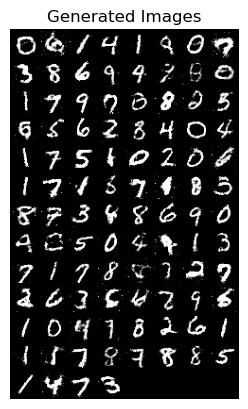

In [24]:
noise_vis = noise(batch_size)
losses = []
for epoch in range(epochs):
    for i, (real_images, _) in enumerate(data_loader):
        batch_size = real_images.size(0)
        # Train the discriminator with real images
        real_images = real_images.view(batch_size, -1)
        real_labels = torch.ones(batch_size, 1)
        real_output = discriminator(real_images)
        d_loss_real = criterion(real_output, real_labels)
        # Train the discriminator with fake images
        z = noise(batch_size)
        fake_images = generator(z)
        fake_tensors = fake_images.detach()
        fake_labels = torch.zeros(batch_size, 1)
        fake_output = discriminator(fake_tensors)
        d_loss_fake = criterion(fake_output, fake_labels)
        # Update the discriminator
        d_loss = d_loss_real + d_loss_fake
        discriminator.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # Train the generator
        fake_output = discriminator(fake_images)
        g_loss = criterion(fake_output, real_labels)
        # Update the generator
        generator.zero_grad()
        g_loss.backward()
        optimizer_G.step()
    # Print out the progress
    print(f"Epoch: {epoch+1}/{epochs}, d_loss: {d_loss.item()}, g_loss: {g_loss.item()}")
    losses.append((d_loss.item(), g_loss.item()))
    # Save generated images to visualize progress
    with torch.no_grad():
        generated_images = generator(noise_vis)
        save_images(generated_images, epoch)

# Save the trained generator
torch.save(generator.state_dict(), "mnist_generator.pth")


Training loss

Here we'll check out the training losses for the generator and discriminator.

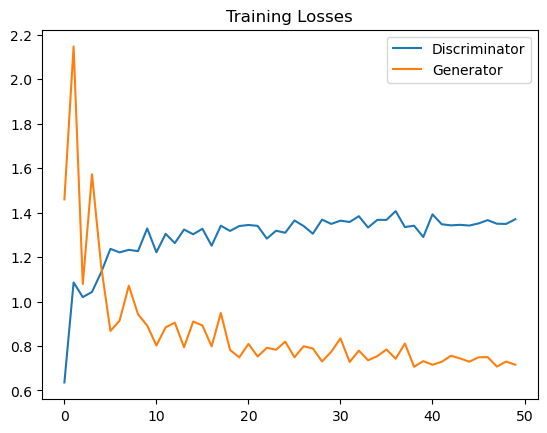

In [25]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator')
plt.plot(losses.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()

Training Generator

With each epoch, the generator learned and here we can see how it progressed.

In [64]:
# Function to generate and display images for a given epoch
def generate_and_display_images(epoch):
    image_path = f"Epoch_images/epoch_{epoch}.png"
    if os.path.exists(image_path):
        fig, ax = plt.subplots(figsize=(10, 10))
        img = plt.imread(image_path)
        plt.imshow(img, cmap='gray')
        plt.title(f"Generated Image - Epoch {epoch}")
        plt.axis('off')
        plt.show()
    else:
        print(f"Image for Epoch {epoch} not found.")
# Use interact to create a slider and link it to the function
interact(generate_and_display_images, epoch=IntSlider(min=1, max=epochs, step=1, value=1))

interactive(children=(IntSlider(value=1, description='epoch', max=50, min=1), Output()), _dom_classes=('widget…

<function __main__.generate_and_display_images(epoch)>

# Generate Image using trained model and Visualize


Our model is already trained. Now we will generate new images with our generator model. At first, at the evaluation process, Disables gradient calculation by torch.no_grad(). Now generate noise for 25 samples. Then generate the images through the generator model. At last, The generated images are displayed through subplots in a 5*5 grid of images.


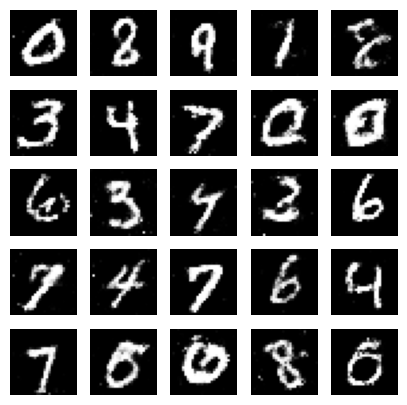

In [60]:
# Visualize generated images
generator.eval()
with torch.no_grad():
    z = noise(25)
    generated_images = generator(z).view(-1, 1, 28, 28).detach().cpu()
fig, axs = plt.subplots(5, 5, figsize=(5, 5))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(generated_images[i, 0], cmap='gray')
    ax.axis('off')
plt.show()

The generated images look like when the Epochs is 50. The generated images are almost realistic.

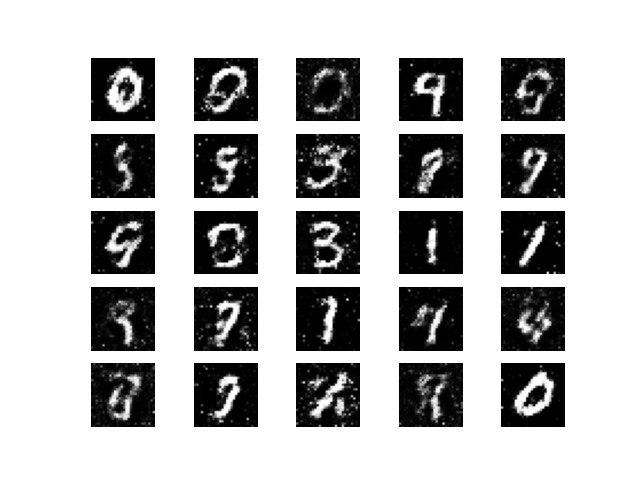

In [49]:
from IPython.display import display, HTML

image_path = 'Images/Generat.jpg'
image_html = f'<img src="{image_path}" style="display: block; margin: 0 auto;">'
display(HTML(image_html))

We have learned how to solve a GAN problem in hands-on coding. The Output of the model is quite Good.

**Q.** How does GAN Training Scale with Batch Size?

# **Practice Exercises**

## 1. Generate 1-D Gaussian Distribution from Uniform Noise
 You will need to generate 1-D Gaussian distribution from a n-D uniform distribution. This is a toy exercise in order to understand the ability of GANs (generators) to generate arbitrary distributions from random noise.

GANs are able to learn a generative model from arbitrary noise distributions.
Traditional GANs face challenges in effectively learning higher-order moments due to limited samples and the difficulty of approximating them. This often leads to under-predicting higher-order variances. For people interested in learning why, read more about divergence measures between distributions (particularly about Wasserstein, etc.)

## 2. The Birthday Paradox Test
 States that in a group of people, there is a higher likelihood of two individuals sharing the same birthday than one might expect. Apply the Birthday Paradox Test to GANs and explain how it relates to GANs.

This technique can be used to evaluate the diversity and uniqueness of samples generated by Generative Adversarial Networks (GANs).

# **Questions**

1. What are the Trade-Offs Between GANs and other Generative Models?

2. How can we scale GANs beyond image synthesis?

3. How should we evaluate GANs and when should we use them?

4. What sorts of distributions can GANs model?

5. What can we say about the global convergence of GAN training?